2025-06-29 21:45:26.669 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-29 21:45:26.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 21:45:26.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 21:45:26.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 21:45:26.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-29 21:45:26.747 
  command:

    streamlit run /opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-pac

EIDs in cov but not in processed_ids: set()
EIDs in processed_ids but not in cov: set()
Number of EIDs in cov: 400000
Number of EIDs in processed_ids: 400000
Number of overlapping EIDs: 400000
Number of unique individuals in statins: 78028
Number of people in df_drug: 78028
Number of people in both df_drug and cov: 68370
365845
34155
400000
0
0


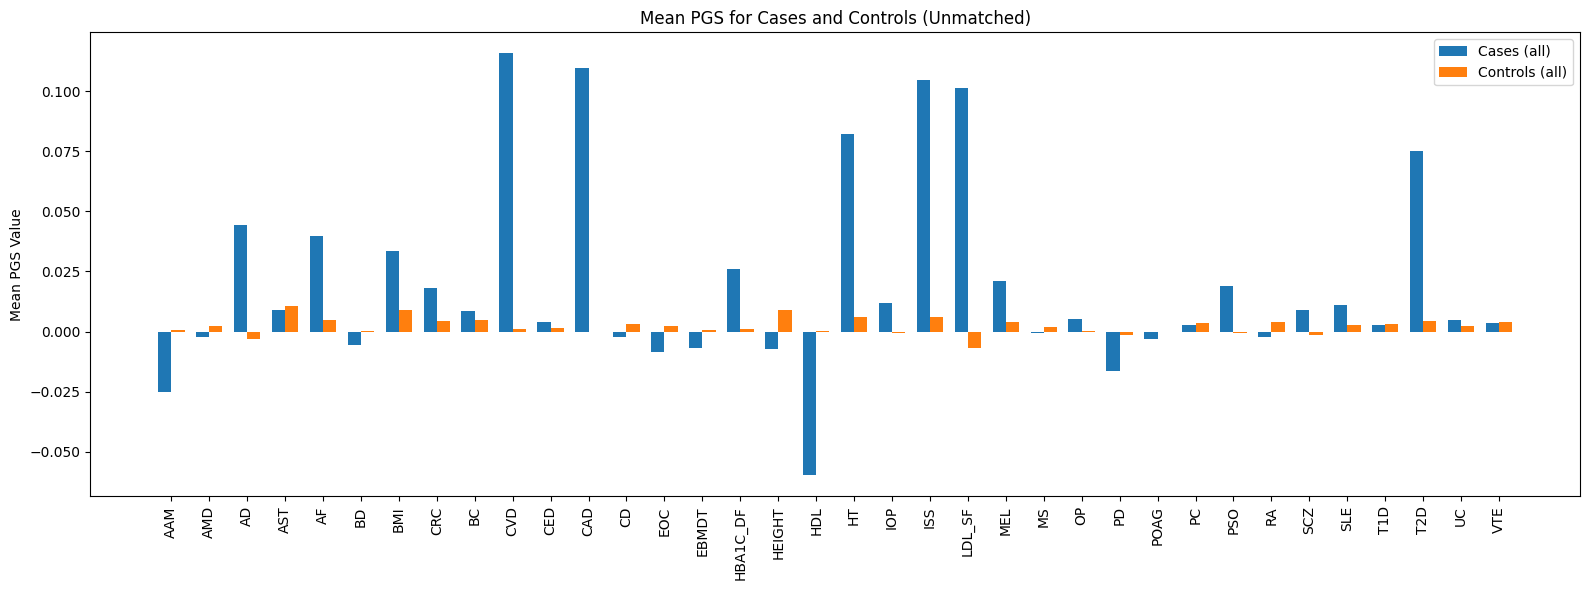

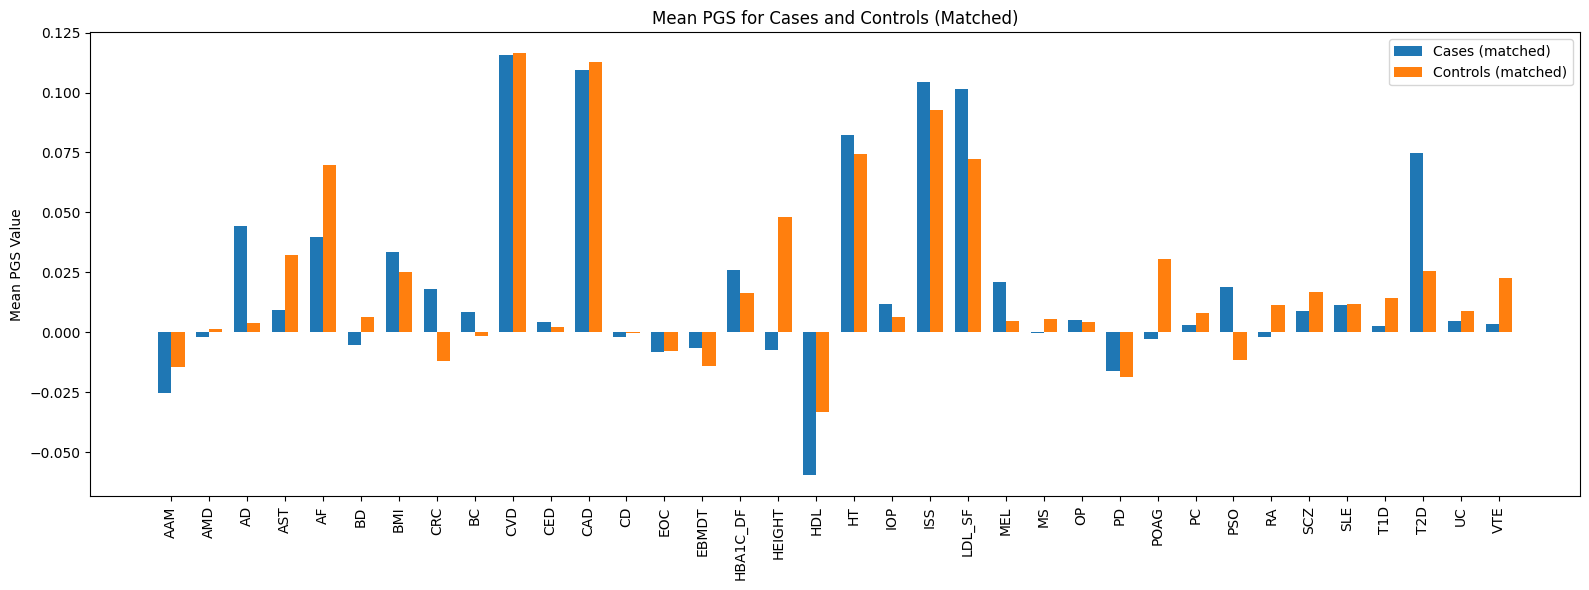

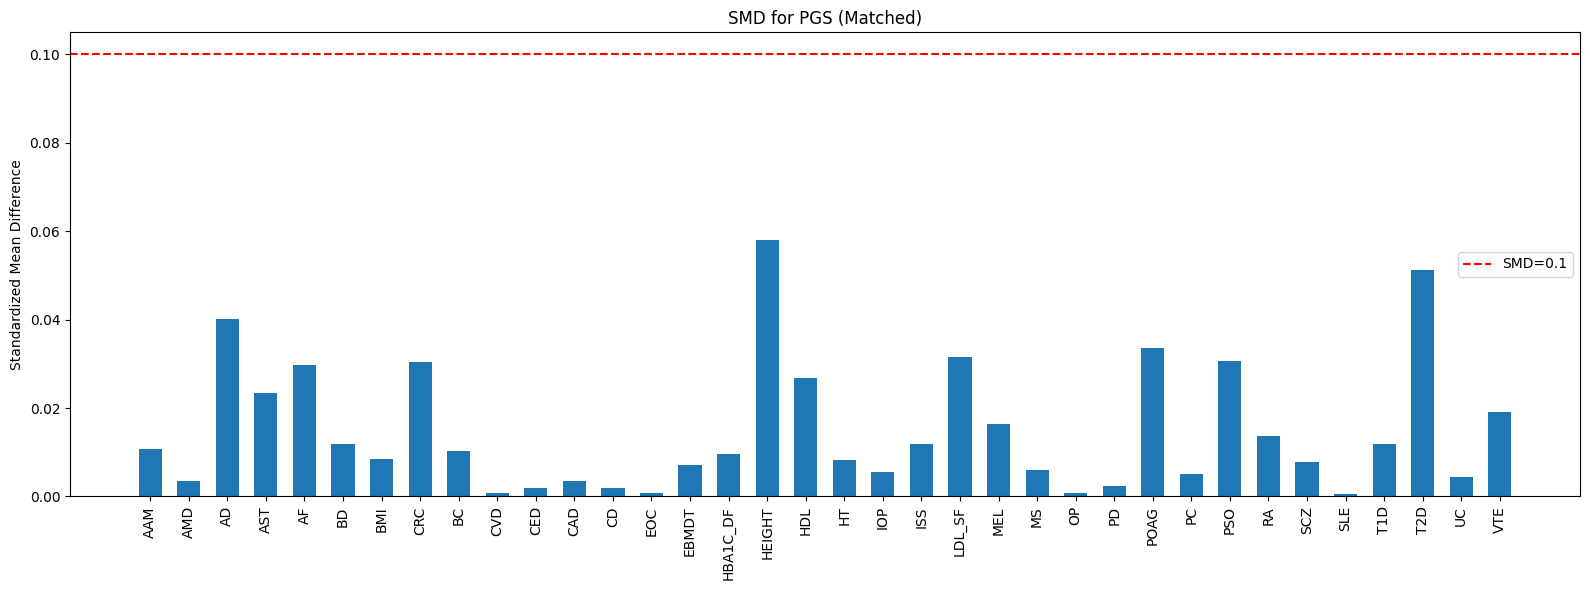

(34155, 29)
(365845, 29)
(34155, 29)
(27798, 29)
Number of missing matched control EIDs: 0
[]
Number of unique matched_control_eids: 27798
Total matched_control_eids: 34155

Sex distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.453,0.552,0.453,0.496
1,0.547,0.448,0.547,0.504



SmokingStatusv2 distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
Current,0.142,0.106,0.142,0.109
Never,0.473,0.537,0.473,0.507
Previous,0.386,0.357,0.386,0.384



prev_dm distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.939,0.94,0.939,0.95
1,0.061,0.06,0.061,0.05



prev_hl distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.859,0.835,0.859,0.848
1,0.141,0.165,0.141,0.152



race distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
asian,0.025,0.022,0.025,0.017
black,0.009,0.016,0.009,0.008
mixed,0.004,0.006,0.004,0.004
other,0.006,0.009,0.006,0.006
white,0.956,0.948,0.956,0.965



antihtnbase distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.783,0.816,0.783,0.784
1,0.217,0.184,0.217,0.216



Sex distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.453,0.552,0.453,0.496
1,0.547,0.448,0.547,0.504



SmokingStatusv2 distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
Current,0.142,0.106,0.142,0.109
Never,0.473,0.537,0.473,0.507
Previous,0.386,0.357,0.386,0.384



prev_dm distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.939,0.94,0.939,0.95
1,0.061,0.06,0.061,0.05



prev_hl distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.859,0.835,0.859,0.848
1,0.141,0.165,0.141,0.152



race distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
asian,0.025,0.022,0.025,0.017
black,0.009,0.016,0.009,0.008
mixed,0.004,0.006,0.004,0.004
other,0.006,0.009,0.006,0.006
white,0.956,0.948,0.956,0.965



antihtnbase distribution table:


,Treated (all),Control (all),Treated (matched),Control (matched)
0,0.783,0.816,0.783,0.784
1,0.217,0.184,0.217,0.216


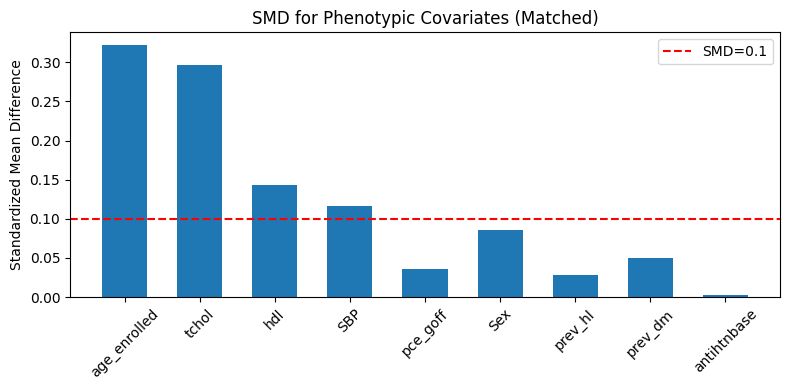

age_enrolled: SMD = 0.322
tchol: SMD = 0.296
hdl: SMD = 0.143
SBP: SMD = 0.116
pce_goff: SMD = 0.036
Sex: SMD = 0.086
prev_hl: SMD = 0.029
prev_dm: SMD = 0.050
antihtnbase: SMD = 0.002


In [1]:
# Load cocde and do it for plotting 
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from dt import *
import torch
import pandas as pd
# Set seeds
import random
random.seed(42)
np.random.seed(42)





# Load data (as in your code)
thetas = np.load("thetas.npy")
processed_ids = np.load("processed_patient_ids.npy").astype(int)

prs_names=pd.read_csv('prs_names.csv')
prs_labels = prs_names['Names'].tolist()


disease_names_df = pd.read_csv("disease_names.csv")
disease_names = disease_names_df.iloc[:, 1].tolist()
G = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/G_matrix.pt")
G = G.detach().cpu().numpy()
#covariate_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox/for_regenie/ukbb_covariates_400k.txt'
cov=pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')
cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)
cov['enrollment'] = pd.to_datetime(cov['Enrollment_Date'], errors='coerce')
cov['age_at_enroll'] = cov['enrollment'].dt.year - cov['birth_year']
age_at_enroll = dict(zip(cov['eid'], cov['age_at_enroll']))
eid_to_yob = dict(zip(cov['eid'], cov['birth_year']))

prescription_path = 'prescriptions.csv'
df_treat = pd.read_csv(prescription_path)
df_treat['eid'] = df_treat['eid'].astype(int)
df_treat = df_treat.merge(cov[['eid', 'birth_year']], on='eid', how='left')
df_treat['from'] = pd.to_datetime(df_treat['from'], errors='coerce')


# If processed_ids is not a pandas Series, convert it for convenience
processed_ids = pd.Series(processed_ids)

# Check if all cov['eid'] are in processed_ids and vice versa
cov_eids = set(cov['eid'])
processed_eids = set(processed_ids)

print("EIDs in cov but not in processed_ids:", cov_eids - processed_eids)
print("EIDs in processed_ids but not in cov:", processed_eids - cov_eids)
print("Number of EIDs in cov:", len(cov_eids))
print("Number of EIDs in processed_ids:", len(processed_eids))
print("Number of overlapping EIDs:", len(cov_eids & processed_eids))

drug_category = "statins"  # or "antidiabetic", etc.
df_drug = df_treat if drug_category == "All" else df_treat[df_treat['category'] == drug_category]
num_unique_eids = df_drug['eid'].nunique()
print(f"Number of unique individuals in {drug_category}: {num_unique_eids}")
# EIDs in df_treat and cov
treat_eids = set(df_drug['eid'])
overlap_treat_cov = treat_eids & cov_eids

print("Number of people in df_drug:", len(treat_eids))
print("Number of people in both df_drug and cov:", len(overlap_treat_cov))

# Only keep rows where statin start is after enrollment
# Find first statin prescription for each person
first_presc = df_drug.groupby('eid')['from'].min().reset_index()
first_presc = first_presc.merge(
    cov[['eid', 'Birthdate','Enrollment_Date']],
    left_on='eid', right_on='eid', how='left'
)

first_presc['Birthdate'] = pd.to_datetime(first_presc['Birthdate'])
first_presc['from'] = pd.to_datetime(first_presc['from'])

# Calculate age in years (including fraction)
first_presc['age_at_first_script'] = (first_presc['from'] - first_presc['Birthdate']).dt.days / 365.25
incident_treated = first_presc[first_presc['from'] > first_presc['Enrollment_Date']].copy()
incident_treated['age_at_first_script'] = (incident_treated['from'] - incident_treated['Birthdate']).dt.days/365.25
incident_treated['years_since_30'] = (incident_treated['age_at_first_script'] - 30).round()
incident_treated.shape

# Example usage:
prev_condition(cov, 'Dm_Any', 'Dm_censor_age', 'age_enrolled', 'prev_dm')
prev_condition(cov, 'DmT1_Any', 'DmT1_censor_age', 'age_enrolled', 'prev_dm1')
prev_condition(cov, 'Ht_Any', 'Ht_censor_age', 'age_enrolled', 'prev_ht')
prev_condition(cov, 'HyperLip_Any', 'HyperLip_censor_age', 'age_enrolled', 'prev_hl')

ldl_idx = prs_labels.index('LDL_SF')   # or whatever your LDL PRS is called
cad_idx = prs_labels.index('CAD')      # or whatever your CAD PRS is called
eid_to_dm2_prev = dict(zip(cov['eid'], cov['prev_dm']))
eid_to_antihtnbase = dict(zip(cov['eid'], cov['prev_ht']))
eid_to_htn = dict(zip(cov['eid'], cov['prev_ht']))
eid_to_smoke = dict(zip(cov['eid'], cov['SmokingStatusv2']))
eid_to_dm1_prev = dict(zip(cov['eid'], cov['prev_dm1']))
eid_to_hl_prev = dict(zip(cov['eid'], cov['prev_hl']))
eid_to_sex = dict(zip(cov['eid'],cov['Sex']))
eid_to_age=dict(zip(cov['eid'],cov['age_enrolled']))
eid_to_ldl_prs = {eid: G[i, ldl_idx] for i, eid in enumerate(processed_ids)}
eid_to_cad_prs = {eid: G[i, cad_idx] for i, eid in enumerate(processed_ids)}
eid_to_race=dict(zip(cov['eid'],cov['race']))
eid_to_pce_goff=dict(zip(cov['eid'],cov['pce_goff']))
eid_to_tchol=dict(zip(cov['eid'],cov['tchol']))
eid_to_hdl=dict(zip(cov['eid'],cov['hdl']))
eid_to_sbp=dict(zip(cov['eid'],cov['SBP']))

# Get timing and incident vs control ids
# For treated
treated_eids = incident_treated['eid']
treated_t0s = incident_treated['years_since_30']
treated_t0_dict = dict(zip(treated_eids, treated_t0s))
len(treated_t0_dict)
len(treated_eids)

# For controls
# (Assuming untreated_eids is a list of EIDs for controls)
treated_eids_set = set(incident_treated['eid'])
untreated_eids = [eid for eid in processed_ids if eid not in treated_eids_set]


# When selecting from covariate DataFrame:
controls_df = cov[cov['eid'].isin(untreated_eids)]

controls = cov[cov['eid'].isin(untreated_eids)].copy()
controls['years_since_30'] = (controls['age_enrolled'] - 30).round()
control_eids = controls['eid']
control_t0s = controls['years_since_30']
print(len(untreated_eids))
print(len(treated_eids_set))
print(len(untreated_eids)+len(treated_eids_set))
covariate_dicts = {
    'age_at_enroll': eid_to_age,
    'sex': eid_to_sex,
    'dm2_prev': eid_to_dm2_prev,
    'antihtnbase': eid_to_antihtnbase,
    'dm1_prev': eid_to_hl_prev,
    'smoke': eid_to_smoke,
    'ldl_prs': eid_to_ldl_prs,
    'cad_prs': eid_to_cad_prs,
    'tchol': eid_to_tchol,
    'hdl': eid_to_hdl,
    'sbp': eid_to_sbp,
    'pce_goff': eid_to_pce_goff
   
    
}
# Prepare lists of eids and t0s for treated and controls
from dt import *

treated_eids_list = list(treated_eids)
treated_t0s_list = list(treated_t0s)

control_eids_list = list(control_eids)
control_t0s_list = list(control_t0s)

# Build features
treated_features, treated_indices,treated_eids_matched = build_features(
    treated_eids_list, treated_t0s_list, processed_ids, thetas, covariate_dicts
)

control_features, control_indices,control_eids_matched = build_features(
    control_eids_list, control_t0s_list, processed_ids, thetas, covariate_dicts
)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Impute missing values on the raw features
imputer = SimpleImputer(strategy='mean')
all_features = np.vstack([treated_features, control_features])
imputer.fit(all_features)

treated_features_imputed = imputer.transform(treated_features)
control_features_imputed = imputer.transform(control_features)

# 2. Standardize the imputed features
scaler = StandardScaler().fit(np.vstack([treated_features_imputed, control_features_imputed]))
treated_features_std = scaler.transform(treated_features_imputed)
control_features_std = scaler.transform(control_features_imputed)

print(np.isnan(control_features_std).sum())
print(np.isnan(treated_features_std).sum())

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(control_features_std)
distances, indices = nn.kneighbors(treated_features_std)
matched_control_indices = [control_indices[i[0]] for i in indices]
matched_treated_indices = treated_indices  # these are the treateds you matched
matched_control_eids = [control_eids_matched[i] for i in indices.flatten()]
# G: shape (n_individuals, n_prs)
# G: shape (n_individuals, n_prs)

treated_indices = [np.where(processed_ids == int(eid))[0][0] for eid in treated_eids]
untreated_indices = [np.where(processed_ids == int(eid))[0][0] for eid in untreated_eids]


means_matched_cases = G[matched_treated_indices].mean(axis=0)
means_matched_controls = G[matched_control_indices].mean(axis=0)

means_unmatched_cases = G[treated_indices].mean(axis=0)
means_unmatched_controls = G[untreated_indices].mean(axis=0)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(prs_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x - width/2, means_unmatched_cases, width, label='Cases (all)')
ax.bar(x + width/2, means_unmatched_controls, width, label='Controls (all)')
ax.set_ylabel('Mean PGS Value')
ax.set_title('Mean PGS for Cases and Controls (Unmatched)')
ax.set_xticks(x)
ax.set_xticklabels(prs_labels, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(x - width/2, means_matched_cases, width, label='Cases (matched)')
ax.bar(x + width/2, means_matched_controls, width, label='Controls (matched)')
ax.set_ylabel('Mean PGS Value')
ax.set_title('Mean PGS for Cases and Controls (Matched)')
ax.set_xticks(x)
ax.set_xticklabels(prs_labels, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

def compute_smd(x1, x0):
    m1, m0 = np.nanmean(x1), np.nanmean(x0)
    s1, s0 = np.nanstd(x1), np.nanstd(x0)
    return np.abs(m1 - m0) / np.sqrt((s1**2 + s0**2) / 2)

smds_matched = []
for i, prs in enumerate(prs_labels):
    smds_matched.append(compute_smd(
        G[matched_treated_indices, i], G[matched_control_indices, i]
    ))

x = np.arange(len(prs_labels))
plt.figure(figsize=(16,6))
plt.bar(x, smds_matched, width=0.6)
plt.axhline(0.1, color='red', linestyle='--', label='SMD=0.1')
plt.xticks(x, prs_labels, rotation=90)
plt.ylabel('Standardized Mean Difference')
plt.title('SMD for PGS (Matched)')
plt.legend()
plt.tight_layout()
plt.show()
treated_eids = list(treated_eids)
groups = {
    'Treated (all)': cov[cov['eid'].isin(treated_eids_matched)],
    'Control (all)': cov[cov['eid'].isin(untreated_eids)],
    'Treated (matched)': cov[cov['eid'].isin(treated_eids_matched)],
    'Control (matched)': cov[cov['eid'].isin(matched_control_eids)],
    
}

print(groups['Treated (all)'].shape)
print(groups['Control (all)'].shape)
print(groups['Treated (matched)'].shape)
print(groups['Control (matched)'].shape)
len(matched_control_eids)

missing = set(matched_control_eids) - set(cov['eid'])
print(f"Number of missing matched control EIDs: {len(missing)}")
print(list(missing)[:10])  # Show a few examples

print(f"Number of unique matched_control_eids: {len(set(matched_control_eids))}")
print(f"Total matched_control_eids: {len(matched_control_eids)}")

categorical_covariates = ['Sex', 'SmokingStatusv2', 'prev_dm', 'prev_hl','race','prev_ht']

for covariate in categorical_covariates:
    # Get all possible categories
    categories = set()
    for df in groups.values():
        categories.update(df[covariate].dropna().unique())
    categories = sorted(categories)
    cat_summary = pd.DataFrame(index=categories)
    for group_name, df in groups.items():
        cat_summary[group_name] = df[covariate].value_counts(normalize=True).reindex(categories, fill_value=0)
    print(f"\n{covariate} distribution table:")
    display(cat_summary.round(3))





covariates = ['age_at_enroll', 'tchol', 'hdl', 'SBP']
summary = pd.DataFrame(index=covariates)

groups = {
    'Treated (all)': cov[cov['eid'].isin(treated_eids_matched)],
    'Control (all)': cov[cov['eid'].isin(untreated_eids)],
    'Treated (matched)': cov[cov['eid'].isin(treated_eids_matched)],
    'Control (matched)': cov[cov['eid'].isin(matched_control_eids)],
}

for group_name, df in groups.items():
    summary[(group_name, 'mean')] = df[covariates].mean()
    summary[(group_name, 'std')] = df[covariates].std()

# Reorder columns for clarity
summary = summary.reindex(columns=pd.MultiIndex.from_product(
    [['Treated (all)', 'Control (all)', 'Treated (matched)', 'Control (matched)'], ['mean', 'std']]
))

# Display as a nice table
summary.round(2)


treated_matched=cov[cov['eid'].isin(treated_eids_matched)]
control_matched=cov[cov['eid'].isin(matched_control_eids)]

import numpy as np
import matplotlib.pyplot as plt

def compute_smd(x1, x0):
    m1, m0 = np.nanmean(x1), np.nanmean(x0)
    s1, s0 = np.nanstd(x1), np.nanstd(x0)
    return np.abs(m1 - m0) / np.sqrt((s1**2 + s0**2) / 2)

covariates = ['age_enrolled', 'tchol', 'hdl', 'SBP', 'pce_goff','Sex','prev_hl','prev_dm','antihtnbase']
smds_matched = []
for covariate in covariates:
    smds_matched.append(compute_smd(
        treated_matched[covariate], control_matched[covariate]
    ))

x = np.arange(len(covariates))
plt.figure(figsize=(8,4))
plt.bar(x, smds_matched, width=0.6)
plt.axhline(0.1, color='red', linestyle='--', label='SMD=0.1')
plt.xticks(x, covariates, rotation=45)
plt.ylabel('Standardized Mean Difference')
plt.title('SMD for Phenotypic Covariates (Matched)')
plt.legend()
plt.tight_layout()
plt.show()

# Print SMDs for reference
for covariate, smd in zip(covariates, smds_matched):
    print(f"{covariate}: SMD = {smd:.3f}")

In [ ]:
# For treated: merge in age_at_first_script
treated_t0_age = incident_treated.set_index('eid')['age_at_first_script']

# For controls: use age at enrollment
control_t0_age = pce_df.set_index('Identifier')['age']

# Add t0_age to df_matched
t0_ages = []
for idx, row in df_matched.iterrows():
    if row['treatment'] == 1:
        t0_ages.append(treated_t0_age.get(row['Identifier'], np.nan))
    else:
        t0_ages.append(control_t0_age.get(row['Identifier'], np.nan))
df_matched['t0_age'] = t0_ages

In [564]:
df_matched['t0_age'] = pd.to_numeric(df_matched['t0_age'], errors='coerce')

In [ ]:
# Only keep those whose CAD event (if any) is after t0, or who are censored before any event
df_matched = df_matched[
    (df_matched['Cad_hard_Any'] == 1) |  # No event
    (df_matched['Cad_hard_censor_age'] >= df_matched['t0_age'])  # Event/censoring after t0
].copy()

In [569]:
df_matched['time'] = df_matched['Cad_hard_censor_age'] - df_matched['t0_age']
df_matched['event'] = (
    (df_matched['Cad_hard_Any'] == 2) &
    (df_matched['Cad_hard_censor_age'] >= df_matched['t0_age'])
).astype(int)

In [576]:
df_matched_clean = df_matched[df_matched['time'] > 0].copy()

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
for label, group in df_matched_clean.groupby('treatment'):
    kmf.fit(group['time'], group['event'], label='Treated' if label==1 else 'Control')
    kmf.plot_survival_function()

plt.title('CAD-free Survival by Treatment')
plt.xlabel('Years since t0')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [ ]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_matched_clean[['time', 'event', 'treatment']], duration_col='time', event_col='event')
cph.print_summary()